# Principal Component Analysis

Problem: Image Compression (PCA)

For this problem we use the Principal Component Analysis (PCA) algorithm.

The goal of PCA is the compression of data, attempting to minimize the MSE for some matrices F and W:
\begin{equation}
J_{PCA} = E\{||e||^{2}\} = E\{||x - WFx||^{2}\}
\end{equation}
The optimal solution is found when defining F and W as
\begin{equation}
F = [u_1, ..., u_m]^{T}\\
W = [u_1, ..., u_m]
\end{equation}
with error
\begin{equation}
J_{PCA} = \sum_{i=m+1}^{n}λ_i
\end{equation}
where u<sub>i</sub> are eigenvectors of the covariance matrix
\begin{equation}
R_x = E\{xx^{T}\}
\end{equation}
meaning
\begin{equation}
R_xu_i = \lambda_iu_i
\end{equation}
where λ<sub>i</sub> are the ordered eigenvalues of R<sub>x</sub> in descending order.

PCA steps:
- Remove the mean value from the initial data
- Calculate the covariance matrix
- Calculate the eigenvectors and eigenvalues of the covariance matrix
- Order eigenvalues in descending order
- Select the first n features with the largest eigenvalues
- Create a matrix of the top-n eigenvectors and multiply by the normalized initial data

It is worth pointing out that a good practice is the normalization of the data before applying PCA, but this was not implemented in this case.

This problem also includes a Gaussian Naive Bayes model with default parameters, but it will not be discussed, since this is out of scope for this exercise.

The goal of this problem is the compression of digit images with the use of PCA and the evaluation of a model trained on the compressed images.

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

We load the digits along with their targets.

In [2]:
data = np.load('mnist_49.npz')
x = data['x']
t = data['t']

Let's take a look at a digit

1

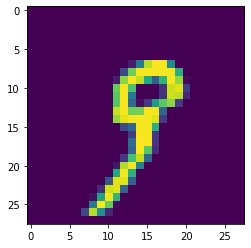

In [3]:
plt.imshow(x[3].reshape(28, 28))
t[3]

Targets consist of zeros and ones.

In [4]:
t[:10]

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1], dtype=uint8)

We implement the following procedure for 1, 2, 5, 10, 20, 30, 40, 50, 100 and 200 dimensions:
+ We apply PCA to the digit data
+ We create training and test sets from the compressed data
+ We create a Naive Bayes model and train it on the training set
+ We retrieve the accuracy for the test and training data, which we store in dictionaries at each epoch

In [5]:
num_components = [1, 2, 5, 10, 20, 30, 40, 50, 100, 200]

acc_train = {}
acc_test = {}

for n in num_components:
    pca = PCA(n)
    x_pca = pca.fit_transform(x)
    expected_shape = (11791, n)
    print('x_pca shape ' 
          + 'is' if x_pca.shape == expected_shape else 'is not', 
          'of shape', 
          expected_shape)
    X_train, X_test, t_train, t_test = train_test_split(x_pca, t, stratify=t)
    nb_clf = GaussianNB().fit(X_train, t_train)
    acc_train[n] = nb_clf.score(X_train, t_train)
    acc_test[n] = nb_clf.score(X_test, t_test)

x_pca shape is of shape (11791, 1)
x_pca shape is of shape (11791, 2)
x_pca shape is of shape (11791, 5)
x_pca shape is of shape (11791, 10)
x_pca shape is of shape (11791, 20)
x_pca shape is of shape (11791, 30)
x_pca shape is of shape (11791, 40)
x_pca shape is of shape (11791, 50)
x_pca shape is of shape (11791, 100)
x_pca shape is of shape (11791, 200)


Finally, after the repetitive process, we display a plot with the progression of accuracies over the number of dimensions

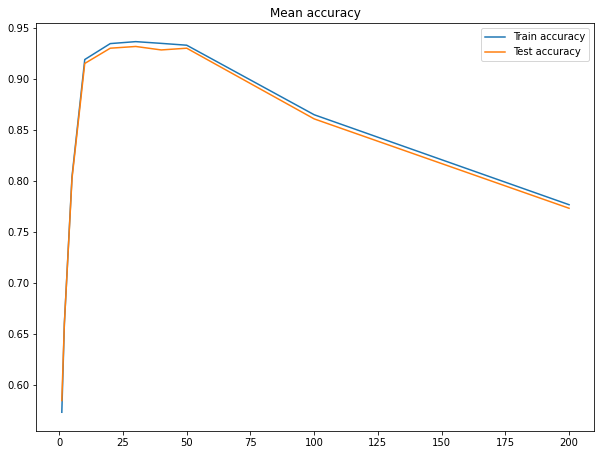

In [6]:
plt.figure(figsize=(10,7.5))
plt.plot(acc_train.keys(), acc_train.values(), label='Train accuracy')
plt.plot(acc_test.keys(), acc_test.values(), label='Test accuracy')
plt.title('Mean accuracy')
plt.legend()
plt.show()